In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pathlib import Path
from tifffile import imread
from datetime import datetime
import numpy as np
from skimage.measure import regionprops
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment
from collections import defaultdict
import pickle


In [ ]:
# === USER CONFIGURATION ===
# Set project + data directories (defined by user)
BASE_PROJECT_DIR = Path("/content/drive/MyDrive/MP_Epithelia_2025/cellposeSAM_mount_LD/Hyperthelia_project")



In [ ]:
# === AUTO CONFIGURATION ===
# Output lobcation
OUTPUTS_DIR = BASE_PROJECT_DIR / "outputs"

# Tracking parameters (editable by user)
XY_UM = 0.325
Z_UM = 1.0
MAX_DIST_UM = 10
MIN_VOLUME = 5000
MAX_VOLUME = 150000
EDGE_MARGIN = 1
TRACKING_MODE = "nearest"


In [ ]:
LIB_DIR = BASE_PROJECT_DIR / "notebooks" / "lib"
if str(LIB_DIR) not in sys.path:
    sys.path.insert(0, str(LIB_DIR))

# print(" Using LIB_DIR:", LIB_DIR)

import tracking
import propagation
import visualisation

import importlib
# importlib.reload(tracking)
# importlib.reload(propagation)
# importlib.reload(visualisation)


🔍 Looking for segmented TIFFs in: /content/drive/MyDrive/MP_Epithelia_2025/cellposeSAM_mount_LD/Hyperthelia_project/outputs

📁 Checking: /content/drive/MyDrive/MP_Epithelia_2025/cellposeSAM_mount_LD/Hyperthelia_project/outputs/outputs_ITB1cell3/raw_segmented_tiffs
✅ Found 6 TIFF(s) in /content/drive/MyDrive/MP_Epithelia_2025/cellposeSAM_mount_LD/Hyperthelia_project/outputs/outputs_ITB1cell3/raw_segmented_tiffs
📝 Timepoint log saved to: /content/drive/MyDrive/MP_Epithelia_2025/cellposeSAM_mount_LD/Hyperthelia_project/outputs/outputs_ITB1cell3/tracking/timepoint_log.txt

🔍 Plotting volumes for experiment: ITB1cell3 (6 TIFFs)


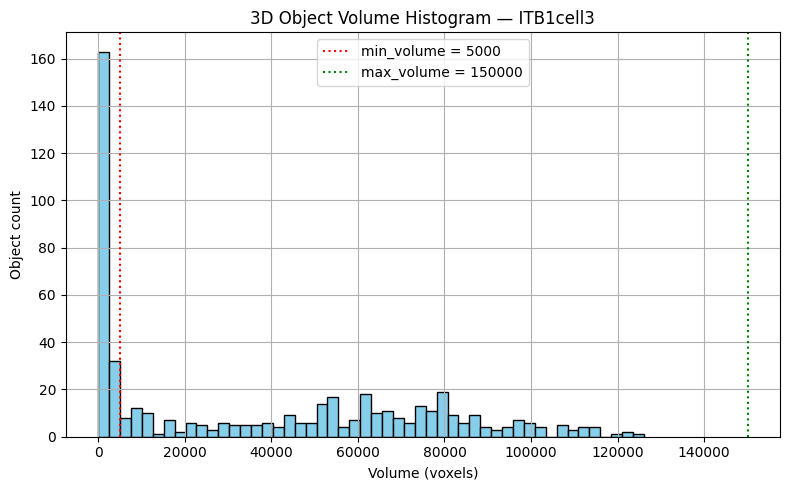


🩻 Viewing experiment: ITB1cell3, timepoint 0, Z-slice 18


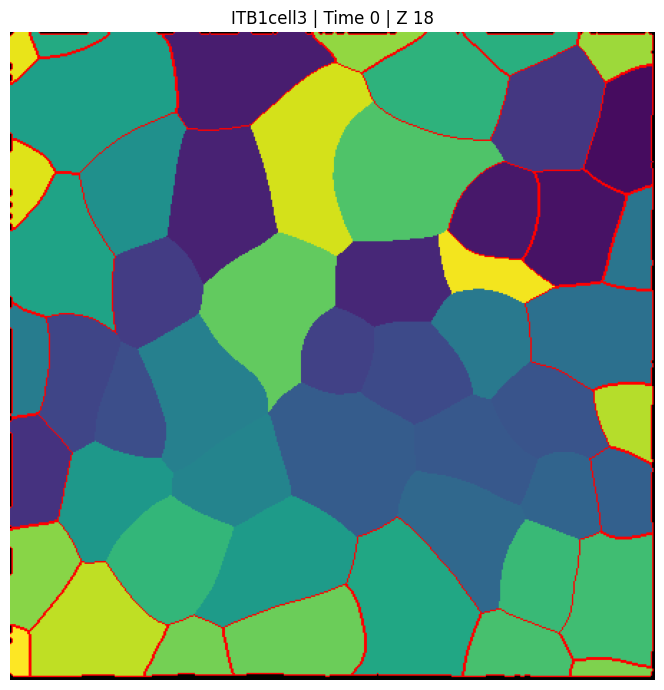

In [ ]:
# === STEP 1: VISUALISE PRE-TRACKING ===
from visualisation import plot_volume_histogram_for_experiment, view_segmentation_slice_with_boundaries, get_segmented_tiffs_by_experiment

experiments = get_segmented_tiffs_by_experiment(OUTPUTS_DIR)

plot_volume_histogram_for_experiment(exp_index=0,
                                                   experiments_dict=experiments,
                                                   min_volume=MIN_VOLUME,
                                                   max_volume=MAX_VOLUME)

view_segmentation_slice_with_boundaries(exp_index=0,
                                        experiments_dict=experiments,
                                        time_index=0,
                                        z_slice=18,
                                        edge_margin=EDGE_MARGIN)



In [ ]:
# === STEP 2: RUN TRACKING ===
tracking.run_tracking_pipeline(
    output_base_dir=OUTPUTS_DIR,
    xy_um=XY_UM,
    z_um=Z_UM,
    max_dist_um=MAX_DIST_UM,
    min_volume=MIN_VOLUME,
    max_volume=MAX_VOLUME,
    edge_margin=EDGE_MARGIN,
    tracking_mode=TRACKING_MODE
)


🔍 Looking for segmented TIFFs in: /content/drive/MyDrive/MP_Epithelia_2025/cellposeSAM_mount_LD/Hyperthelia_project/outputs

📁 Checking: /content/drive/MyDrive/MP_Epithelia_2025/cellposeSAM_mount_LD/Hyperthelia_project/outputs/outputs_ITB1cell3/raw_segmented_tiffs
✅ Found 6 TIFF(s) in /content/drive/MyDrive/MP_Epithelia_2025/cellposeSAM_mount_LD/Hyperthelia_project/outputs/outputs_ITB1cell3/raw_segmented_tiffs
📝 Timepoint log saved to: /content/drive/MyDrive/MP_Epithelia_2025/cellposeSAM_mount_LD/Hyperthelia_project/outputs/outputs_ITB1cell3/tracking/timepoint_log.txt

🚀 Tracking 6 TIFF(s) for experiment: ITB1cell3
💾 Saved tracking results to: /content/drive/MyDrive/MP_Epithelia_2025/cellposeSAM_mount_LD/Hyperthelia_project/outputs/outputs_ITB1cell3/tracking/tracked_objects.pkl
🎯 ITB1cell3: Tracked 156 total objects across 6 timepoints.


In [ ]:
# === STEP 3: PROPAGATE LABELS ===
propagation.run_propagation_pipeline(output_base_dir=OUTPUTS_DIR)


🔍 Looking for segmented TIFFs in: /content/drive/MyDrive/MP_Epithelia_2025/cellposeSAM_mount_LD/Hyperthelia_project/outputs

📁 Checking: /content/drive/MyDrive/MP_Epithelia_2025/cellposeSAM_mount_LD/Hyperthelia_project/outputs/outputs_ITB1cell3/raw_segmented_tiffs
✅ Found 6 TIFF(s) in /content/drive/MyDrive/MP_Epithelia_2025/cellposeSAM_mount_LD/Hyperthelia_project/outputs/outputs_ITB1cell3/raw_segmented_tiffs
📝 Timepoint log saved to: /content/drive/MyDrive/MP_Epithelia_2025/cellposeSAM_mount_LD/Hyperthelia_project/outputs/outputs_ITB1cell3/tracking/timepoint_log.txt

📦 Propagating labels for experiment: ITB1cell3
✅ Propagation complete.
→ Full masks:       /content/drive/MyDrive/MP_Epithelia_2025/cellposeSAM_mount_LD/Hyperthelia_project/outputs/outputs_ITB1cell3/tracking/full_masks
→ Centroid masks:   /content/drive/MyDrive/MP_Epithelia_2025/cellposeSAM_mount_LD/Hyperthelia_project/outputs/outputs_ITB1cell3/tracking/centroid_labels
→ Centroid CSV:     /content/drive/MyDrive/MP_Epithe

🔍 Looking for segmented TIFFs in: /content/drive/MyDrive/MP_Epithelia_2025/cellposeSAM_mount_LD/Hyperthelia_project/outputs

📁 Checking: /content/drive/MyDrive/MP_Epithelia_2025/cellposeSAM_mount_LD/Hyperthelia_project/outputs/outputs_ITB1cell3/raw_segmented_tiffs
✅ Found 6 TIFF(s) in /content/drive/MyDrive/MP_Epithelia_2025/cellposeSAM_mount_LD/Hyperthelia_project/outputs/outputs_ITB1cell3/raw_segmented_tiffs
📝 Timepoint log saved to: /content/drive/MyDrive/MP_Epithelia_2025/cellposeSAM_mount_LD/Hyperthelia_project/outputs/outputs_ITB1cell3/tracking/timepoint_log.txt
📈 Visualizing tracking for: ITB1cell3


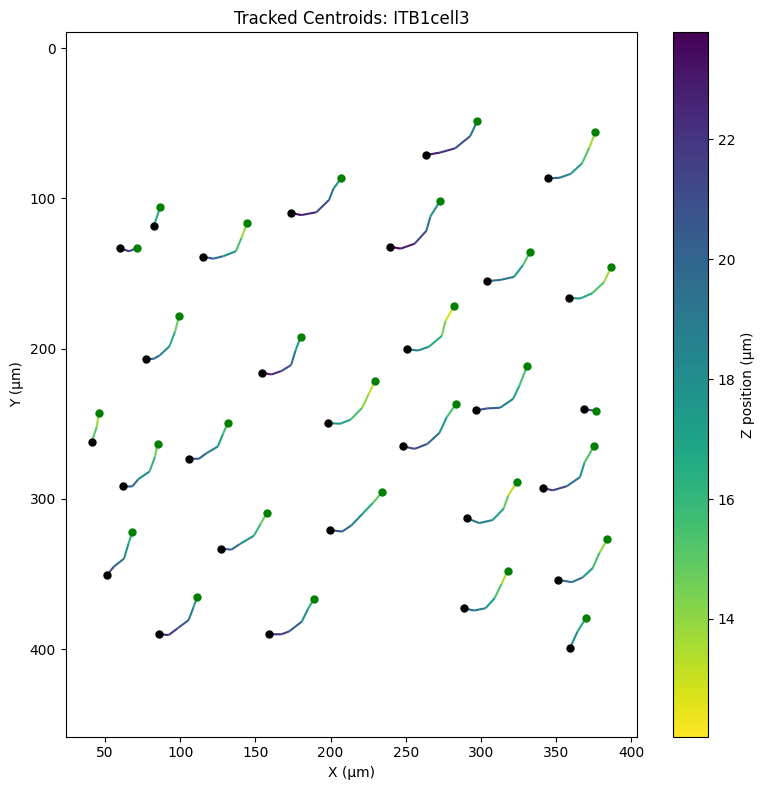

🔍 Looking for segmented TIFFs in: /content/drive/MyDrive/MP_Epithelia_2025/cellposeSAM_mount_LD/Hyperthelia_project/outputs

📁 Checking: /content/drive/MyDrive/MP_Epithelia_2025/cellposeSAM_mount_LD/Hyperthelia_project/outputs/outputs_ITB1cell3/raw_segmented_tiffs
✅ Found 6 TIFF(s) in /content/drive/MyDrive/MP_Epithelia_2025/cellposeSAM_mount_LD/Hyperthelia_project/outputs/outputs_ITB1cell3/raw_segmented_tiffs
📝 Timepoint log saved to: /content/drive/MyDrive/MP_Epithelia_2025/cellposeSAM_mount_LD/Hyperthelia_project/outputs/outputs_ITB1cell3/tracking/timepoint_log.txt


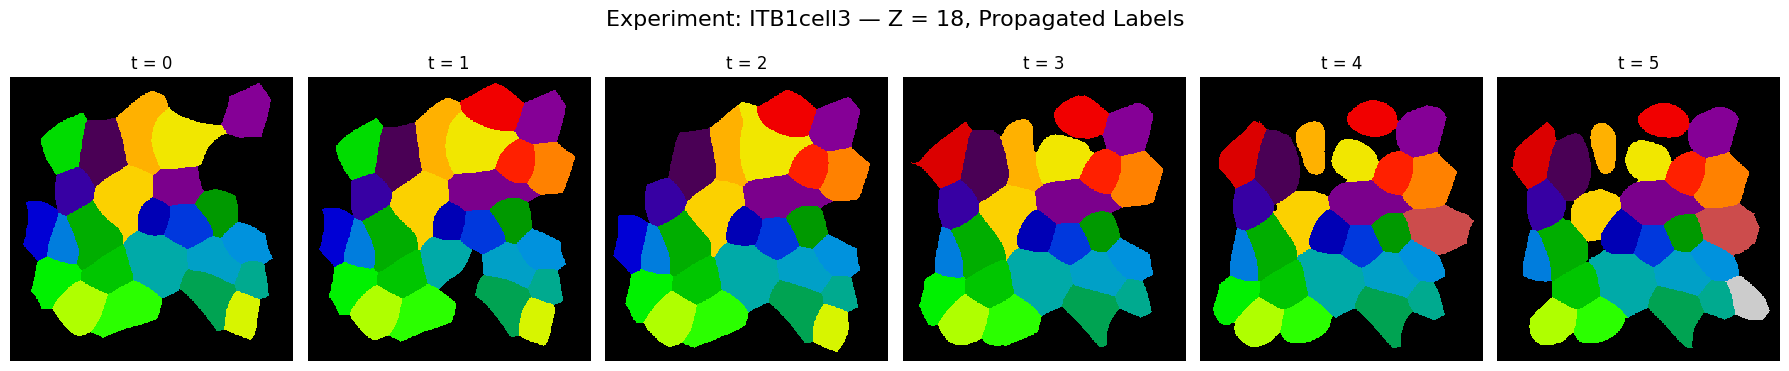

In [ ]:
# === STEP 4: VISUALISE POST-TRACKING ===
visualisation.plot_tracked_centroids_xy_by_index(exp_index=0, output_base_dir=OUTPUTS_DIR)
visualisation.preview_propagated_labels_zslice(exp_index=0, z_slice=18, output_base_dir=OUTPUTS_DIR)
